<a href="https://colab.research.google.com/github/0v3r-9000/trc204.github.io/blob/main/Breast_Cancer_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)

{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy found:  0.8342857142857142


Before SMOTE: Class
0    164
1     64
Name: count, dtype: int64
After SMOTE: Class
1    175
0    175
Name: count, dtype: int64


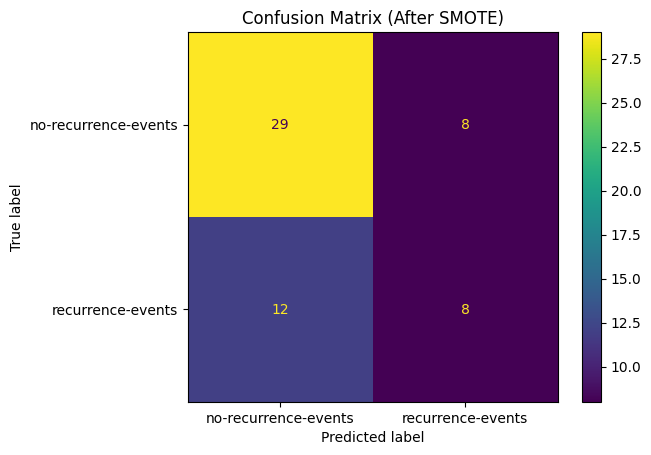

Accuracy on the test set after SMOTE: 0.6491


In [3]:
# Install required packages
%pip install ucimlrepo imbalanced-learn

# === 1. IMPORTS ===
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# === 2. FETCH DATASET ===
breast_cancer = fetch_ucirepo(id=14)

# Extract features and target
X = breast_cancer.data.features
y = breast_cancer.data.targets

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)

# === 3. CLEANING ===
# Drop rows with missing 'breast-quad'
df.dropna(subset=['breast-quad'], inplace=True)

# Encode target variable
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])  # malignant = 0, benign = 1

# === 4. ENCODING CATEGORICAL VARIABLES ===

# Ordinal encoding
ordinal_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'breast-quad']
ordinal_encoder = OrdinalEncoder()
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

# One-hot encoding for nominal categories
df = pd.get_dummies(df, columns=['node-caps', 'breast', 'irradiat'], drop_first=True)

# === 5. SPLIT DATA ===
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 6. HANDLE IMBALANCE WITH SMOTE ===
print("Before SMOTE:", y_train.value_counts())

# Use correct integer class labels
smote = SMOTE(random_state=42, sampling_strategy={0: 175, 1: 175})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_resampled.value_counts())

# === 7. TRAIN MODEL ===


model = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

model.fit(X_train_resampled, y_train_resampled)


# === 8. EVALUATE MODEL ===
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title("Confusion Matrix (After SMOTE)")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set after SMOTE: {accuracy:.4f}")
